In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy.signal import savgol_filter


import pandas as pd
import matplotlib.pyplot as plt
data_0003 = pd.read_csv("data/05144.csv")
voltage_0003 = data_0003['Current_measured']
time_0003 = data_0003['Time']

max_voltage_0003 = voltage_0003.max()

voltage_range = 0.005

voltage_mask_0003 = ((voltage_0003 >= (max_voltage_0003 - voltage_range)) & 
                     (voltage_0003 <= (max_voltage_0003 + voltage_range)))

selected_time_start = time_0003[voltage_mask_0003].iloc[0]
selected_time_end = time_0003[voltage_mask_0003].iloc[-1]

# Plot the voltage curve for 0003.csv
plt.figure(figsize=(12, 6))
plt.plot(time_0003, voltage_0003, label='Voltage', color='blue')
plt.fill_between(time_0003, voltage_0003, where=voltage_mask_0003, color='yellow', alpha=0.5)
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage (V)')
plt.title('Voltage Curve for 0003.csv with Selected Range Highlighted')
plt.grid(True)
#plt.ylim(3.5, 4.25)
plt.legend()
plt.show()

print(f"Time Range of Selected Voltage in 0003.csv: {selected_time_start:.2f} s to {selected_time_end:.2f} s")

In [27]:

def calculate_CC_charging_time(data):
    max_current = data['Current_measured'].max()

    current_range = 0.01

    current_mask = ((data['Current_measured'] >= (max_current - current_range)) &
                    (data['Current_measured'] <= (max_current + current_range)))

    CC_start_time = data['Time'][current_mask].iloc[0]
    CC_end_time = data['Time'][current_mask].iloc[-1]

    return CC_start_time, CC_end_time

def calculate_CV_charging_time(data):
    max_voltage = data['Voltage_measured'].max()

    voltage_range = 0.02

    voltage_mask = ((data['Voltage_measured'] >= (max_voltage - voltage_range)) &
                    (data['Voltage_measured'] <= (max_voltage + voltage_range)))

    CV_start_time = data['Time'][voltage_mask].iloc[0]
    CV_end_time = data['Time'][voltage_mask].iloc[-1]

    return CV_start_time, CV_end_time

data_directory = "data"

charging_cycles_data = pd.read_csv("charging Cycles.csv")

file_names = charging_cycles_data['File Name'].tolist()
battery_ids = charging_cycles_data['Battery ID'].tolist()

results = []

for file_name, battery_id in zip(file_names, battery_ids):
    file_path = os.path.join(data_directory, file_name)

    if os.path.exists(file_path):
        data = pd.read_csv(file_path)

        CC_start_time, CC_end_time = calculate_CC_charging_time(data)
        CV_start_time, CV_end_time = calculate_CV_charging_time(data)
        results.append({
            'File Name': file_name,
            'Battery ID': battery_id,
            'CC_Start Time': CC_start_time,
            'CC_End Time': CC_end_time,
            'CV_Start Time': CV_start_time,
            'CV_End Time': CV_end_time,
        })
    else:
        print(f"File not found: {file_name}")

results_df = pd.DataFrame(results)

results_df.to_csv("My_charging_time_results.csv", index=False)
print("Results saved to charging_time_results.csv")


Results saved to charging_time_results.csv


In [65]:
def calculate_CC_discharging_time(data):
    min_current = data['Current_measured'].min()

    current_range = 0.01

    current_mask = ((data['Current_measured'] >= (min_current - current_range)) &
                    (data['Current_measured'] <= (min_current + current_range)))

    CC_start_time = data['Time'][current_mask].iloc[0]
    CC_end_time = data['Time'][current_mask].iloc[-1]

    return CC_start_time, CC_end_time

def Minimum_Discharging_Voltage_time(data):
    min_Voltage = data['Voltage_measured'].min()
    Voltage_range = 0.01
    voltage_mask = ((data['Voltage_measured'] >= (min_Voltage - Voltage_range)) &
                    (data['Voltage_measured'] <= (min_Voltage + Voltage_range)))
    
    min_time = data['Time'][voltage_mask].iloc[0]
    
    return min_time

data_directory = "data"

discharging_cycles_data = pd.read_csv("Discharge Cycles.csv")

file_names = discharging_cycles_data['filename'].tolist()
battery_ids = discharging_cycles_data['battery_id'].tolist()

results = []

for file_name, battery_id in zip(file_names, battery_ids):
    file_path = os.path.join(data_directory, file_name)

    if os.path.exists(file_path):
        data = pd.read_csv(file_path)

        CC_start_time, CC_end_time = calculate_CC_discharging_time(data)
        min_time = Minimum_Discharging_Voltage_time(data)
        results.append({
            'File Name': file_name,
            'Battery ID': battery_id,
            'CC_Start Time': CC_start_time,
            'CC_End Time': CC_end_time,
            'Minimum Discharging Voltage time':min_time,
            
        })
    else:
        print(f"File not found: {file_name}")

results_df = pd.DataFrame(results)

results_df.to_csv("My_discharging_time_results.csv", index=False)
print("Results saved to discharging_time_results.csv")

Results saved to discharging_time_results.csv


In [61]:
import pandas as pd

file_path = 'My_charging_time_results_modified.csv'
df = pd.read_csv(file_path)

grouped = df.groupby('Battery ID_1')

correlation_per_battery = {}

for battery_id, group in grouped:
    correlation_matrix = group.corr()
    correlation_per_battery[battery_id] = correlation_matrix

for battery_id, correlation_matrix in correlation_per_battery.items():
    print(f'\nCorrelation for Battery ID {battery_id}:')
    print(correlation_matrix)


C:\Users\Asus\AppData\Local\Temp\ipykernel_384\1224245283.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = group.corr()



Correlation for Battery ID B0005:
                                     C_Cycle  CC_Start Time  CC_End Time  \
C_Cycle                             1.000000       0.004928    -0.830385   
CC_Start Time                       0.004928       1.000000    -0.055553   
CC_End Time                        -0.830385      -0.055553     1.000000   
CC_charging time                   -0.807378      -0.244442     0.981746   
CV_Start Time(Upper_cutoff_V_Time) -0.854601       0.014054     0.970047   
CV_End Time                         0.177119       0.048190     0.211522   
CV_charging time                    0.626200       0.039671    -0.307385   
Unnamed: 9                               NaN            NaN          NaN   
Last_Time_Value                     0.047742       0.036718     0.316053   
new_CV_time                         0.571649       0.029008    -0.269683   
Unnamed: 12                              NaN            NaN          NaN   
Unnamed: 13                              NaN         

In [62]:

file_path = 'My_charging_time_results_modified.csv'
df = pd.read_csv(file_path)

grouped = df.groupby('Battery ID_2')

correlation_per_battery = {}

for battery_id, group in grouped:
    correlation_matrix = group.corr()
    correlation_per_battery[battery_id] = correlation_matrix

for battery_id, correlation_matrix in correlation_per_battery.items():
    print(f'\nCorrelation for Battery ID {battery_id}:')
    print(correlation_matrix)

C:\Users\Asus\AppData\Local\Temp\ipykernel_384\980298568.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = group.corr()



Correlation for Battery ID B0005:
                                     C_Cycle  CC_Start Time  CC_End Time  \
C_Cycle                             1.000000       0.007271    -0.857144   
CC_Start Time                       0.007271       1.000000    -0.042576   
CC_End Time                        -0.857144      -0.042576     1.000000   
CC_charging time                   -0.838907      -0.216161     0.984676   
CV_Start Time(Upper_cutoff_V_Time) -0.874371       0.021086     0.975113   
CV_End Time                         0.157808       0.049925     0.202010   
CV_charging time                    0.650769       0.035492    -0.365651   
Unnamed: 9                               NaN            NaN          NaN   
Last_Time_Value                     0.041679       0.037428     0.291232   
new_CV_time                         0.612773       0.023028    -0.351179   
Unnamed: 12                              NaN            NaN          NaN   
Unnamed: 13                              NaN         

                                     C_Cycle  CC_Start Time  CC_End Time  \
C_Cycle                             1.000000       0.130829    -0.252997   
CC_Start Time                       0.130829       1.000000    -0.047919   
CC_End Time                        -0.252997      -0.047919     1.000000   
CC_charging time                   -0.253030      -0.048195     1.000000   
CV_Start Time(Upper_cutoff_V_Time)  0.375202       0.055772     0.678530   
CV_End Time                         0.181336       0.012073    -0.421205   
CV_charging time                    0.117445       0.002953    -0.517721   
Unnamed: 9                               NaN            NaN          NaN   
Last_Time_Value                     0.015983      -0.128716    -0.100024   
new_CV_time                        -0.064162      -0.135443    -0.239860   
Unnamed: 12                              NaN            NaN          NaN   
Unnamed: 13                              NaN            NaN          NaN   
D_Cycle     

# Moving window filter

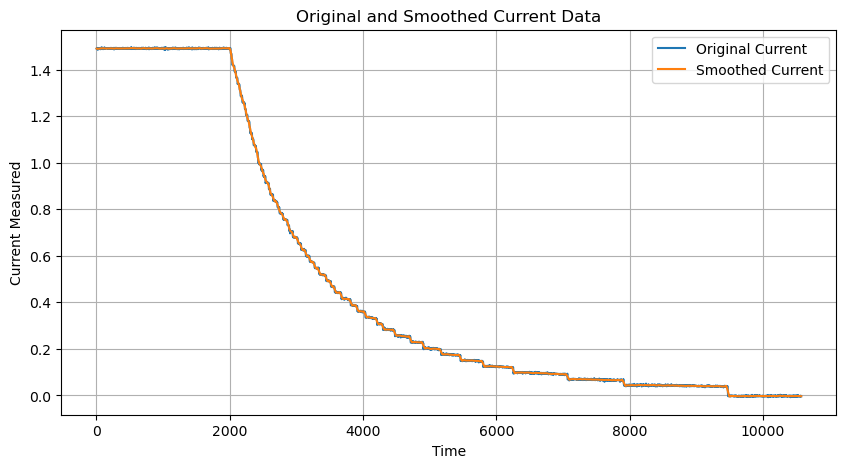

In [4]:
import numpy as np
from scipy.signal import savgol_filter
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('charging_cycles/06342.csv')
time = data['Time']
current = data['Current_measured']
time = time[2:]
current = current[2:]
current_smoothed = savgol_filter(current, window_size, 3)  # 3rd order polynomial

plt.figure(figsize=(10, 5))
plt.plot(time, current, label='Original Current')
plt.plot(time, current_smoothed, label='Smoothed Current')
plt.xlabel('Time')
plt.ylabel('Current Measured')
#plt.xlim(0,1500)
plt.title('Original and Smoothed Current Data')
plt.legend()
plt.grid(True)
plt.show()

# Charging Features


# CC_Charging Time

In [ ]:
import os
import pandas as pd


results_df = pd.DataFrame(columns=['File Name', 'CC_C'])

folder_path = 'charging_cycles'


for file_name in os.listdir(folder_path): # Read all CSV files 
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        data = pd.read_csv(file_path)
        time = data['Time'][2:]
        current = data['Current_measured'][2:]
        time_below_threshold = time[current < 1.5] # times when current drops below 1.5 

        
        first_time_below_threshold = time_below_threshold.iloc[0] if not time_below_threshold.empty else None # Get the first time if current drops below 1.5 
        results_df = results_df.append({'File Name': file_name, 'CC_C': first_time_below_threshold}, ignore_index=True)

results_file_path = 'My_CC_C.csv'
results_df.to_csv(results_file_path, index=False)

print('Results saved to My_CC_C.csv')

In [ ]:
results_df = pd.DataFrame(columns=['File Name', 'CC_C'])
folder_path = 'charging_cycles'

for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        data = pd.read_csv(file_path)

        time = data['Time'][2:]
        current = data['Current_measured'][2:]

        time_below_threshold = time[current >=1.48]
        first_time_below_threshold = time_below_threshold.iloc[-1] if not time_below_threshold.empty else None
        results_df = results_df.append({'File Name': file_name, 'CC_C': first_time_below_threshold}, ignore_index=True)

results_file_path = 'My_CC_C.csv'
results_df.to_csv(results_file_path, index=False)

print('Results saved to My_CC_C.csv')

# Upper cut-off voltage Time


In [ ]:
results_df = pd.DataFrame(columns=['File Name', 'Upper_cutoff_V'])
folder_path = 'charging_cycles'

for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        data = pd.read_csv(file_path)
        time = data['Time']
        voltage = data['Voltage_measured'] 
        time_below_threshold = time[voltage >=4.2]

        first_time_below_threshold = time_below_threshold.iloc[0] if not time_below_threshold.empty else None
        results_df = results_df.append({'File Name': file_name, 'Upper_cutoff_V': first_time_below_threshold}, ignore_index=True)

results_file_path = 'My_Upeer_cutoff_V.csv'
results_df.to_csv(results_file_path, index=False)

print('Results saved to My_Upeer_cutoff_V.csv')

# CV_Charging Time


In [ ]:
results_df = pd.DataFrame(columns=['File Name', 'CV_C'])

folder_path = 'charging_cycles'

for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        data = pd.read_csv(file_path)
        time = data['Time']
        voltage = data['Voltage_measured']
        time_above_threshold = time[voltage >=4.2]

        first_time_below_threshold = time_above_threshold.iloc[-1]- time_above_threshold.iloc[0]if not time_below_threshold.empty else None
        results_df = results_df.append({'File Name': file_name, 'CV_C': first_time_below_threshold}, ignore_index=True)


results_file_path = 'My_CV_C.csv'
results_df.to_csv(results_file_path, index=False)

print('Results saved to My_CV_C.csv')

# Maximum Voltage Charging Time

In [ ]:
import os
import pandas as pd

results_df = pd.DataFrame(columns=['File Name', 'Max_V_Time'])
folder_path = 'charging_cycles'


for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        data = pd.read_csv(file_path)

        max_voltage_index = data['Voltage_measured'].idxmax()
        max_voltage_time = data.at[max_voltage_index, 'Time']

       
        results_df = results_df.append({'File Name': file_name, 'Max_V_Time': max_voltage_time}, ignore_index=True)


results_file_path = 'My_Max_V_Time.csv'
results_df.to_csv(results_file_path, index=False)

print('Results saved to My_Max_V_Time.csv')


# Maximum Temperatue Time

In [3]:
import os
import pandas as pd

results_df = pd.DataFrame(columns=['File Name', 'Max_T_Time'])

folder_path = '.\B0005\charge'

for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        data = pd.read_csv(file_path)
        filter=data['Time']>500
        max_temperature_index = data[filter]['Temperature_measured'].idxmax()

        max_temperature_time = data.at[max_temperature_index, 'Time']

        results_df = results_df.append({'File Name': file_name, 'Max_T_Time': max_temperature_time}, ignore_index=True)


results_file_path = 'My_Max_T_Time.csv'
results_df.to_csv(results_file_path, index=False)

print('Results saved to My_Max_T_Time.csv')


C:\Users\Asus\AppData\Local\Temp\ipykernel_34888\3960940654.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'File Name': file_name, 'Max_T_Time': max_temperature_time}, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_34888\3960940654.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'File Name': file_name, 'Max_T_Time': max_temperature_time}, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_34888\3960940654.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'File Name': file_name, 'Max_T_Time': max_temperature_time}, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_34888\396094065

Results saved to My_Max_T_Time.csv


C:\Users\Asus\AppData\Local\Temp\ipykernel_34888\3960940654.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'File Name': file_name, 'Max_T_Time': max_temperature_time}, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_34888\3960940654.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'File Name': file_name, 'Max_T_Time': max_temperature_time}, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_34888\3960940654.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'File Name': file_name, 'Max_T_Time': max_temperature_time}, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_34888\396094065

# Discharging Features

# Max Temperature Time

In [13]:
results_df = pd.DataFrame(columns=['File Name', 'Max_T_Time'])

folder_path = './B0018/discharge/'

for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        data = pd.read_csv(file_path)

        #filter=data['Time']>500
        max_temperature_index = data['Temperature_measured'].idxmax()
        max_temperature_time = data.at[max_temperature_index, 'Time']
        results_df = results_df.append({'File Name': file_name, 'Max_T_Time': max_temperature_time}, ignore_index=True)

results_file_path = 'My_Max_T_Time.csv'
results_df.to_csv(results_file_path, index=False)

print('Results saved to My_Max_T_Time.csv')


C:\Users\Asus\AppData\Local\Temp\ipykernel_20720\2193908760.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'File Name': file_name, 'Max_T_Time': max_temperature_time}, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_20720\2193908760.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'File Name': file_name, 'Max_T_Time': max_temperature_time}, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_20720\2193908760.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'File Name': file_name, 'Max_T_Time': max_temperature_time}, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_20720\219390876

Results saved to My_Max_T_Time.csv


C:\Users\Asus\AppData\Local\Temp\ipykernel_20720\2193908760.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'File Name': file_name, 'Max_T_Time': max_temperature_time}, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_20720\2193908760.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'File Name': file_name, 'Max_T_Time': max_temperature_time}, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_20720\2193908760.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'File Name': file_name, 'Max_T_Time': max_temperature_time}, ignore_index=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_20720\219390876

# Correlation - Charge



C:\Users\Asus\AppData\Local\Temp\ipykernel_34888\125406715.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = group.corr()


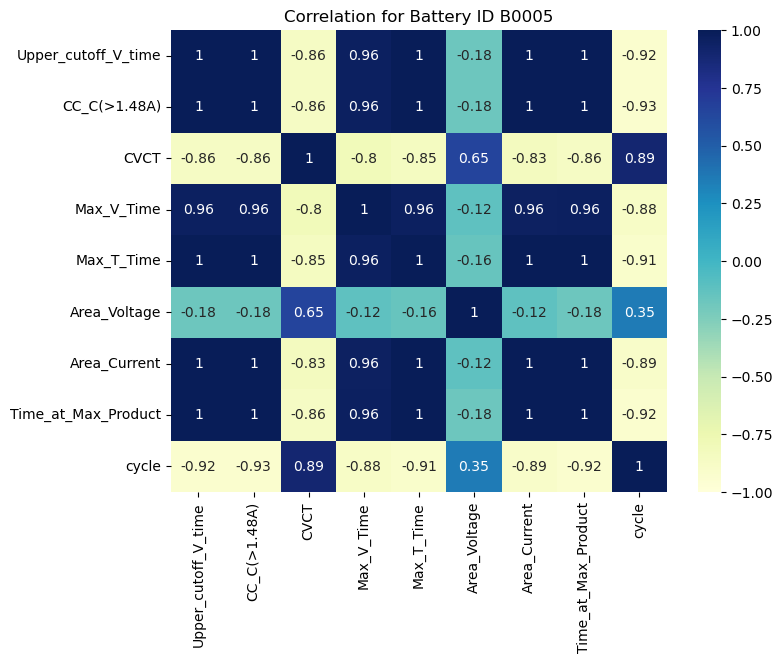

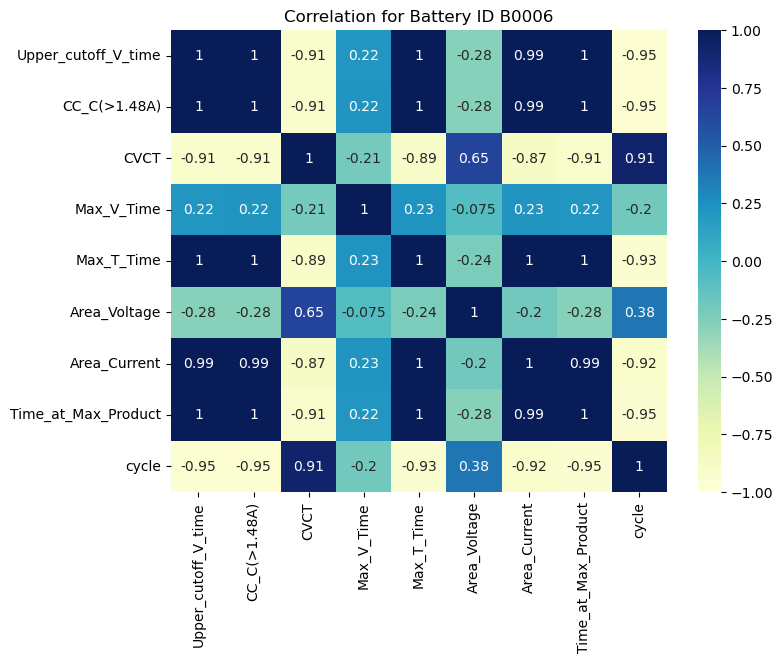

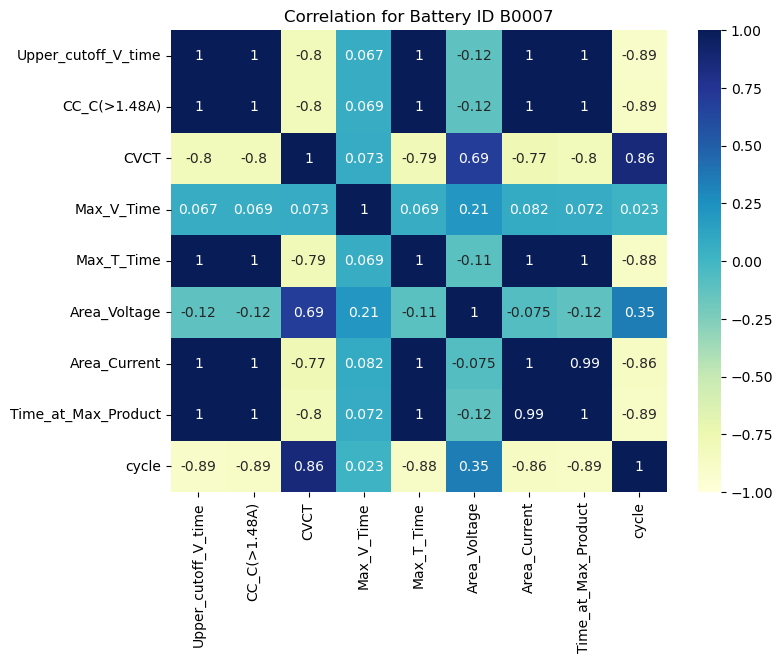

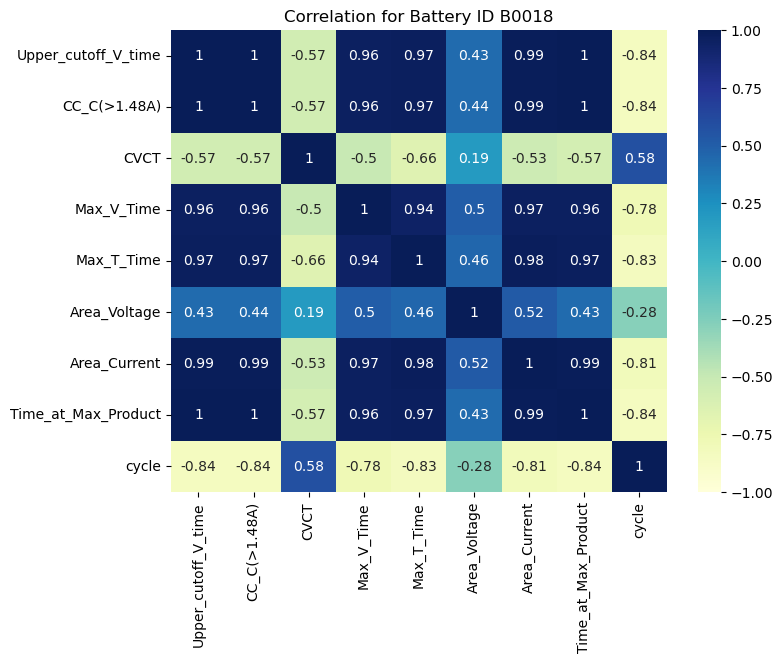

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file = 'charge.xlsx'
df = pd.read_excel(file)

grouped = df.groupby('battery_id')

correlation_per_battery = {}

for battery_id, group in grouped:
    correlation_matrix = group.corr()
    correlation_per_battery[battery_id] = correlation_matrix

for battery_id, correlation_matrix in correlation_per_battery.items():
    plt.figure(figsize=(8, 6))
    plt.title(f'Correlation for Battery ID {battery_id}')
    sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)
    plt.show()

# Correlation - Discharge

C:\Users\Asus\AppData\Local\Temp\ipykernel_34888\3869222889.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = group.corr()


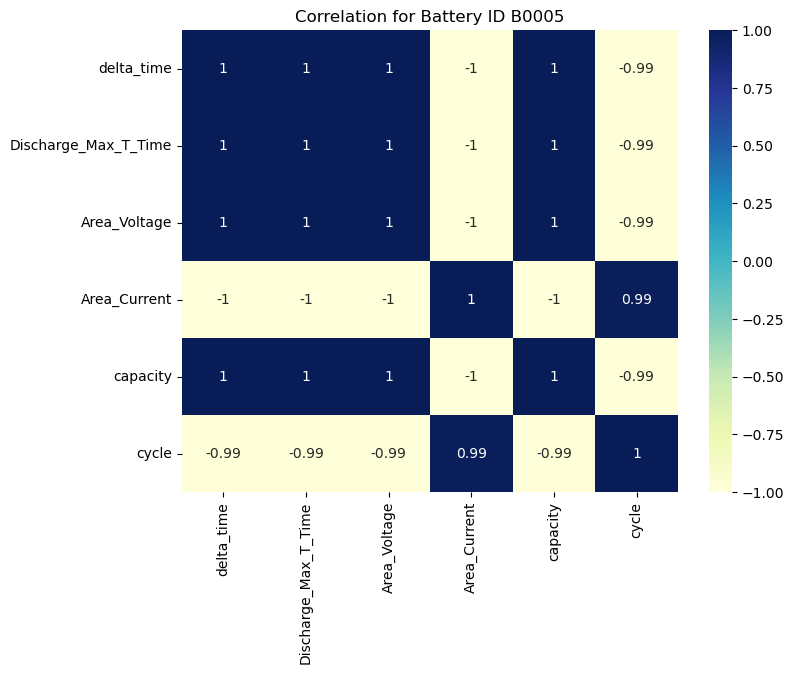

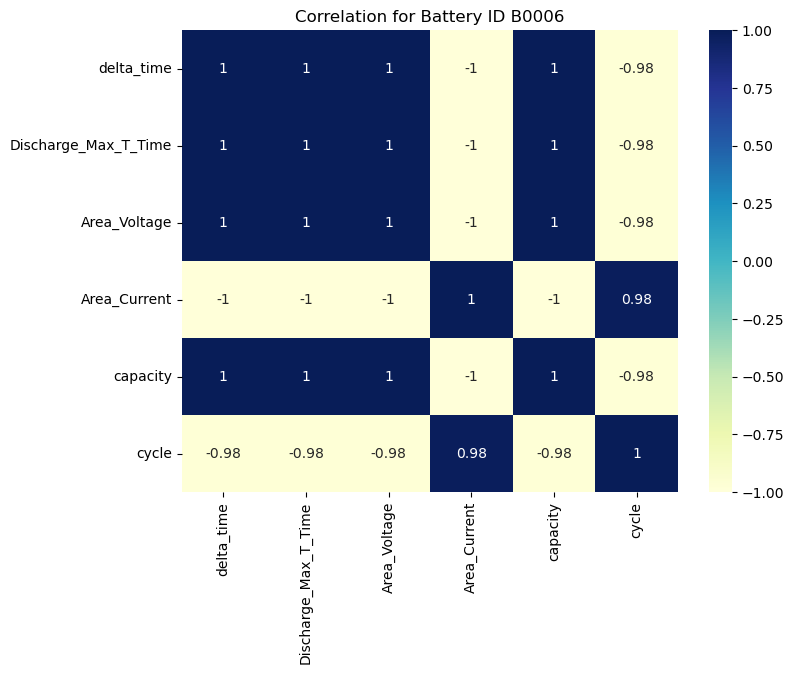

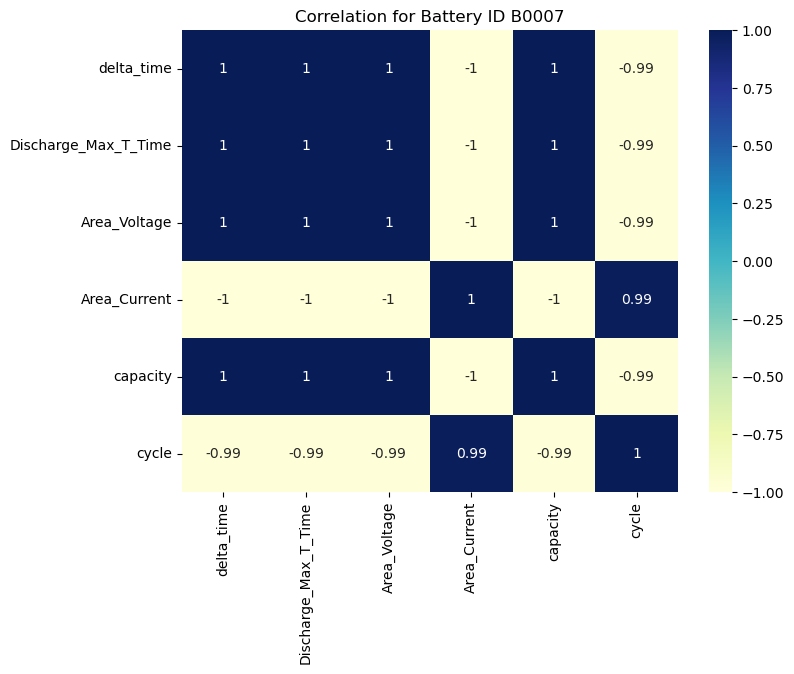

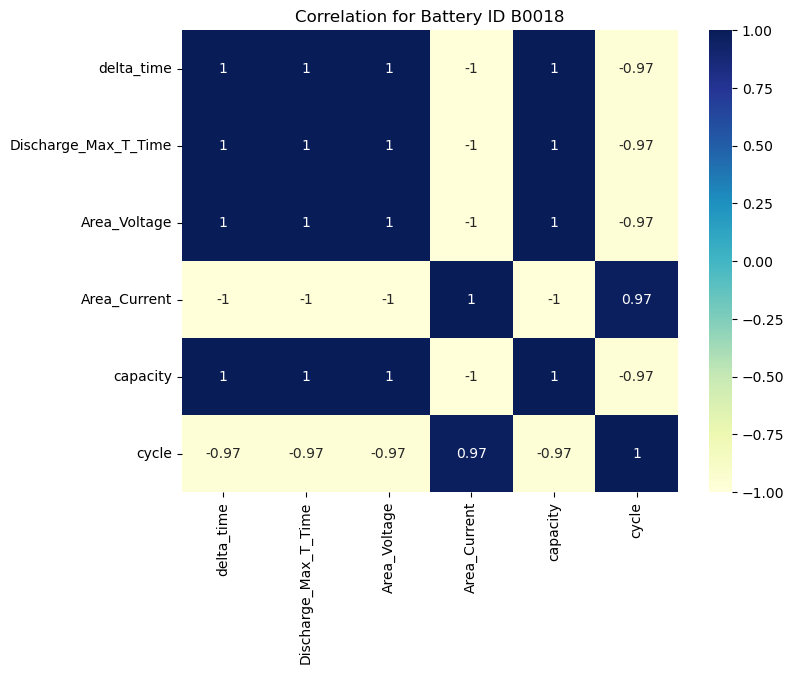

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file = 'Discharge.xlsx'
df = pd.read_excel(file)

grouped = df.groupby('battery_id')

correlation_per_battery = {}

for battery_id, group in grouped:
    correlation_matrix = group.corr()
    correlation_per_battery[battery_id] = correlation_matrix

for battery_id, correlation_matrix in correlation_per_battery.items():
    plt.figure(figsize=(8, 6))
    plt.title(f'Correlation for Battery ID {battery_id}')
    sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)
    plt.show()